In [1]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
import cv2
import glob

In [2]:
!wget "https://github.com/elizabethg123/waveform_image_ml/raw/main/test_images.zip" 
!unzip test_images.zip

--2021-11-08 16:17:43--  https://github.com/elizabethg123/waveform_image_ml/raw/main/test_images.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/elizabethg123/waveform_image_ml/main/test_images.zip [following]
--2021-11-08 16:17:43--  https://raw.githubusercontent.com/elizabethg123/waveform_image_ml/main/test_images.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 489210 (478K) [application/zip]
Saving to: ‘test_images.zip’

test_images.zip     100%[===================>] 477.74K  --.-KB/s    in 0.04s   

2021-11-08 16:17:44 (12.4 MB/s) - ‘test_images.zip’ saved [489210/489210]

Archive:  

/content/test_images/ATE Group Delay (ps)211025191450.png


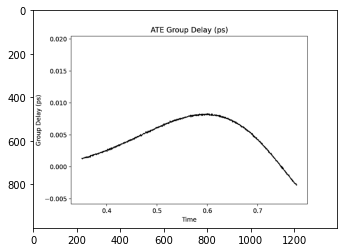

/content/test_images/ATE ACLR Low. Adj. Channel (dBc)211025190238.png


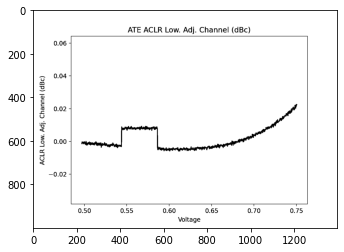

/content/test_images/ATE Gain Flatness (dB)211025191400.png


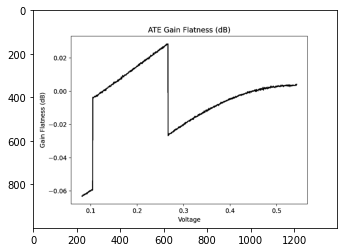

/content/test_images/ATE Gain (dB)211025191620.png


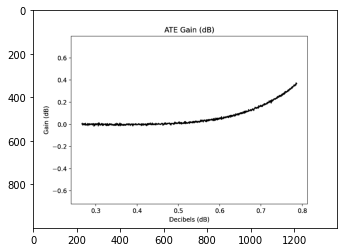

/content/test_images/ATE Group Delay (ps)211025191447.png


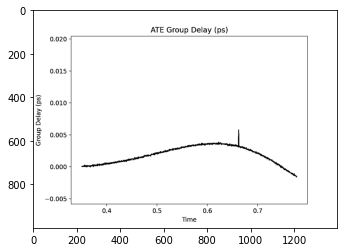

/content/test_images/ATE Group Delay (ps)211025191452.png


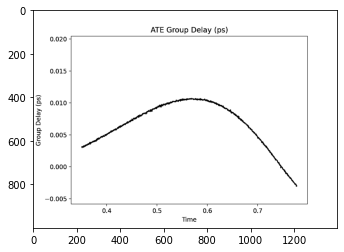

/content/test_images/ATE Gain (dB)211025191626.png


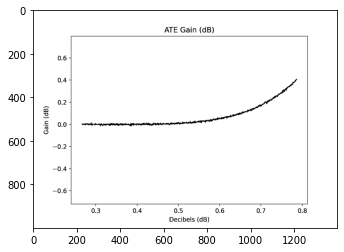

/content/test_images/ATE ACLR Low. Adj. Channel (dBc)211025190236.png


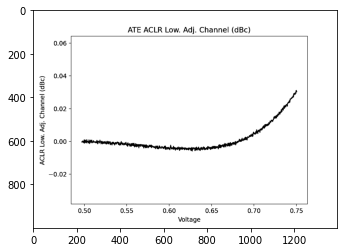

/content/test_images/ATE ACLR Low. Adj. Channel (dBc)211025190241.png


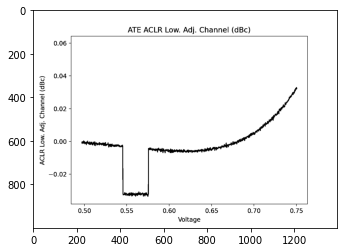

In [3]:
# Create dataset
labels = ['Gain', 'Group Delay', 'ACLR']
X = []
y = []
path = "/content/test_images/*.*"
for file in glob.glob(path):
   print(file)
   for el in labels:
    if el in file:
      y.append(el)
   img = cv2.imread(file, 0)
   ret, img_binary = cv2.threshold(img, 200, 255, cv2.THRESH_BINARY)
   X.append(img_binary)
   plt.imshow(img_binary, 'gray')
   plt.show()

In [4]:
# reshape for sklearn
X = np.array(X).reshape(9, 1000*1400)

In [5]:
# k-means clustering
kmeans_model = KMeans(n_clusters=3, random_state=1).fit(X)
k_labels = kmeans_model.labels_
metrics.silhouette_score(X, k_labels, metric='euclidean')
k_labels

array([0, 1, 2, 2, 0, 0, 2, 1, 1], dtype=int32)

Group 0 
label Group Delay


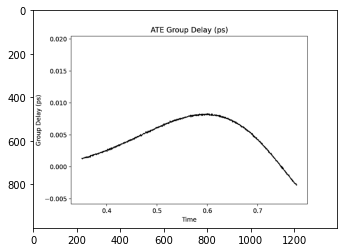

Group 0 
label Group Delay


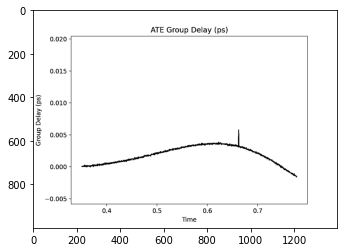

Group 0 
label Group Delay


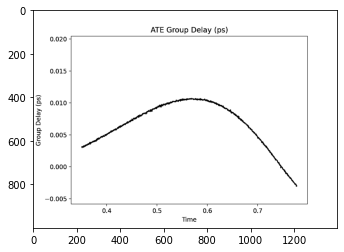

Group 1 
label ACLR


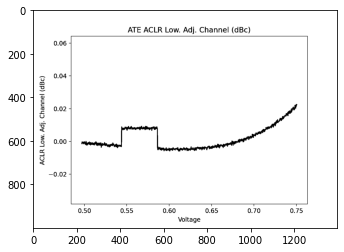

Group 1 
label ACLR


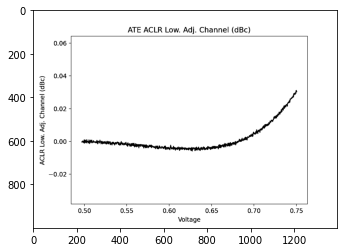

Group 1 
label ACLR


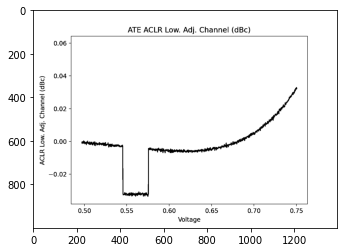

Group 2 
label Gain


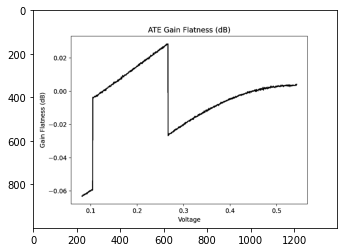

Group 2 
label Gain


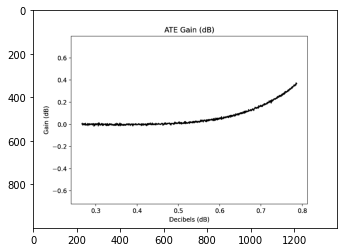

Group 2 
label Gain


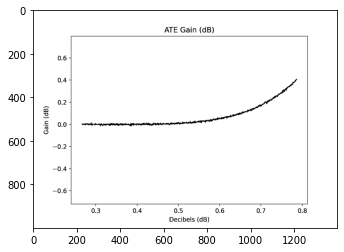

In [6]:
# add group, label, and image to an array
k_labels = k_labels.reshape(9,1)
labeled_X = []
for i in range(len(X)):
  labeled_X.append([k_labels[i], y[i], X[i]])

# sort by group and display elements
labeled_X.sort(key = lambda x: x[0]) 
for row in labeled_X:
  print('Group', row[0][0], '\nlabel', row[1])
  plt.imshow(row[2].reshape(1000,1400), 'gray')
  plt.show()

For n_clusters = 3 The average silhouette_score is : 0.28585522878901637


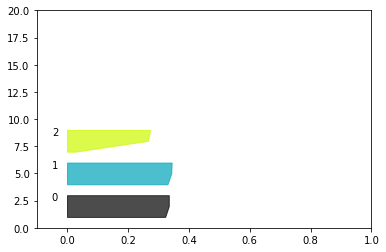

In [ ]:
# silhouette graph
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

n_clusters = 3

#fig = plt.figure()
ax1 = plt.axes()
ax1.set_xlim([-.1, 1])
ax1.set_ylim([0, 20])

# get clusters
clusterer = KMeans(n_clusters=n_clusters, random_state=10)
cluster_labels = clusterer.fit_predict(X)

# The silhouette_score gives the average value for all the samples
silhouette_avg = silhouette_score(X, cluster_labels)
print(
    "For n_clusters =",
    n_clusters,
    "The average silhouette_score is :",
    silhouette_avg,
)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X, cluster_labels)

y_lower = 1
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )   

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower += size_cluster_i